<a href="https://colab.research.google.com/github/krishkrishna03/EDA_PROJECT/blob/main/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Exploratory Data Analysis (Univariate and Bivariate)


Step 1: Import required libraries and load the dataset

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the path if necessary)
df = pd.read_csv('dataset.csv')

# Display the first few rows
print(df.head())


   VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel

Step 2: Univariate Analysis - Summary Statistics

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08 

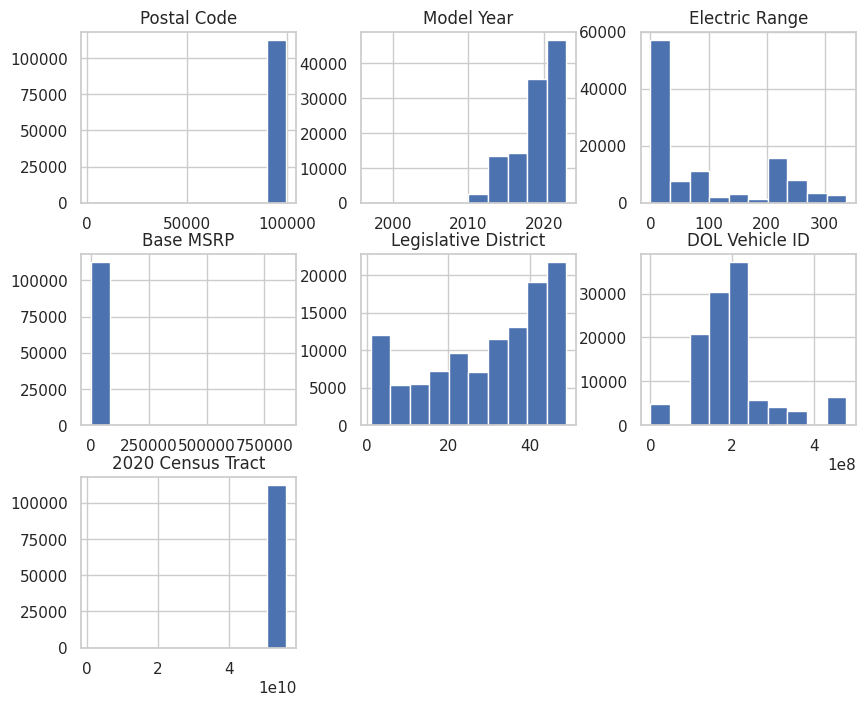

In [22]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Distribution of numerical features
df.hist(figsize=(10, 8))
plt.show()


Step 3: Bivariate Analysis - Correlation Heatmap

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')


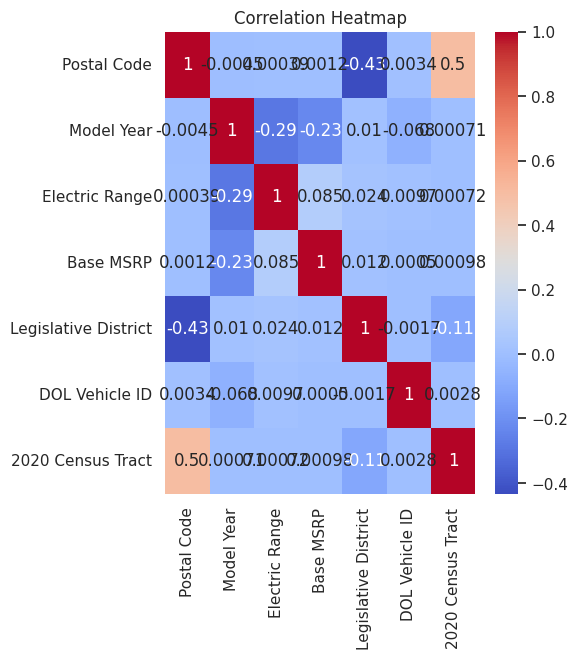

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns from the dataset
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check for numeric columns
print(numeric_df.columns)

# Correlation heatmap
plt.figure(figsize=(5, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Step 4: Bivariate Analysis - Pairplot for selected variables

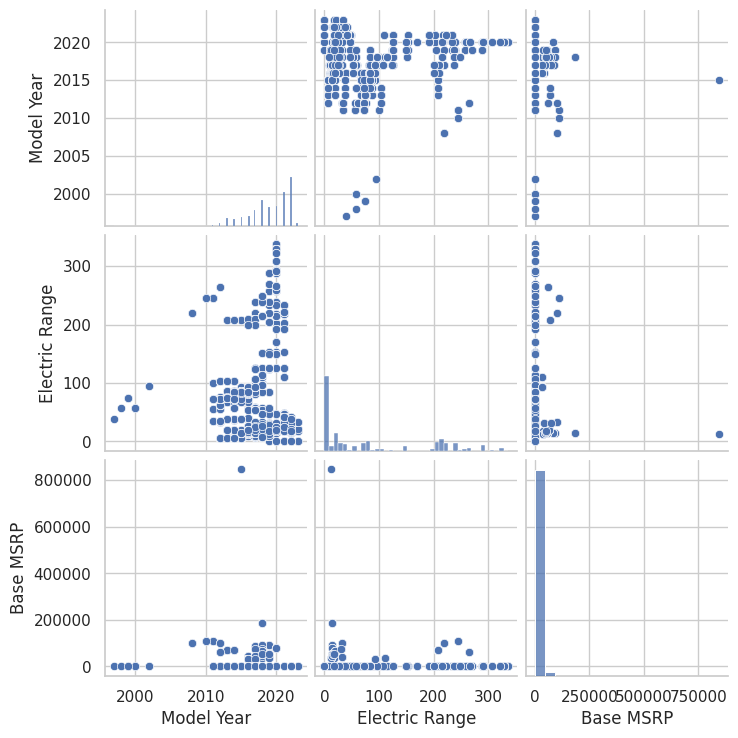

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with the numeric columns 'Model Year', 'Electric Range', and 'Base MSRP'
sns.pairplot(df[['Model Year', 'Electric Range', 'Base MSRP']])
plt.show()


Task 2: Create a Choropleth using Plotly Express
Step 1: Install the necessary library and import Plotly

In [29]:
pip install plotly

Step 2: Create the Choropleth

In [40]:
import plotly.express as px

# Group the data by 'City' and 'Model Year' to get the count of EVs per city per year
ev_by_city_year = df.groupby(['City', 'Model Year']).size().reset_index(name='EV_Count')

# Create the animated Choropleth map
fig = px.choropleth(ev_by_city_year,
                    locations='City',
                    locationmode='country names',  # Use 'city names' or 'country names' for cities
                    color='EV_Count',
                    animation_frame='Model Year',  # Use the year for animation
                    title='Number of Electric Vehicles by City (Animated)')

# Display the plot
fig.show()


Task 3: Create a Racing Bar Plot (EV Make Count by Year)
Step 1: Install the bar_chart_race library

In [33]:
pip install bar_chart_race


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.7 MB/s eta 0:00:00


Step 2: Prepare the dataset for Racing Bar Plot

In [35]:
# Group the data by 'Model Year' and 'Make' to get the count of EVs for each make per year
ev_make_by_year = df.groupby(['Model Year', 'Make']).size().unstack().fillna(0)

# Preview the data
print(ev_make_by_year.head())


Make        AUDI  AZURE DYNAMICS  BENTLEY  BMW  CADILLAC  CHEVROLET  CHRYSLER  \
Model Year                                                                      
1997         0.0             0.0      0.0  0.0       0.0        1.0       0.0   
1998         0.0             0.0      0.0  0.0       0.0        0.0       0.0   
1999         0.0             0.0      0.0  0.0       0.0        0.0       0.0   
2000         0.0             0.0      0.0  0.0       0.0        0.0       0.0   
2002         0.0             0.0      0.0  0.0       0.0        0.0       0.0   

Make        FIAT  FISKER  FORD  ...  POLESTAR  PORSCHE  RIVIAN  SMART  SUBARU  \
Model Year                      ...                                             
1997         0.0     0.0   0.0  ...       0.0      0.0     0.0    0.0     0.0   
1998         0.0     0.0   1.0  ...       0.0      0.0     0.0    0.0     0.0   
1999         0.0     0.0   3.0  ...       0.0      0.0     0.0    0.0     0.0   
2000         0.0     0.0  1

Step 3: Create the Racing Bar Plot

In [36]:
import bar_chart_race as bcr

# Create and save the racing bar chart animation
bcr.bar_chart_race(df=ev_make_by_year, filename='ev_racing_bar_plot.mp4', title='EV Make Count by Year')


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



In [39]:
from IPython.display import Video

# Display the saved video with embed enabled
Video("ev_racing_bar_plot.mp4", embed=True)
